# cLSTM Lorenz-96 Demo
- In this notebook, we train a cLSTM model on data simulated from a Lorenz-96 system

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_lorenz_96
from models.clstm import cLSTM, train_model_ista

In [2]:
# For GPU acceleration
device = torch.device('cuda')

In [3]:
# Simulate data
X_np, GC = simulate_lorenz_96(p=10, F=10, T=1000)
X = torch.tensor(X_np[np.newaxis], dtype=torch.float32, device=device)

In [7]:
len(X_np[0])

10

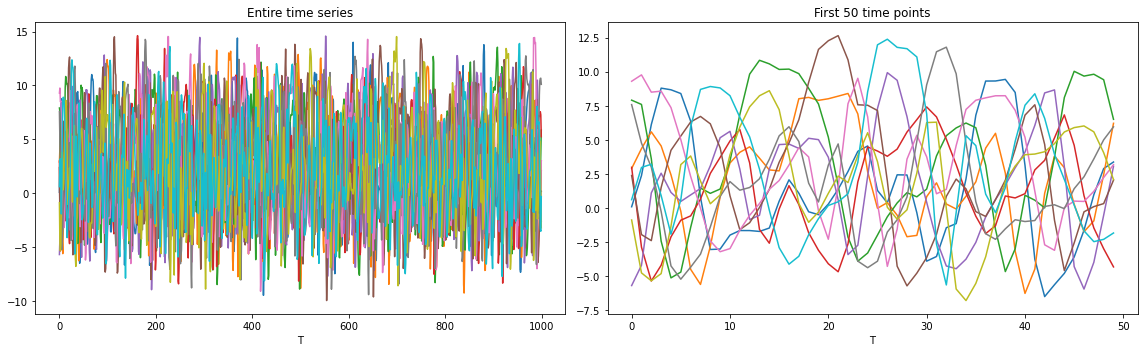

In [4]:
# Plot data
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].plot(X_np)
axarr[0].set_xlabel('T')
axarr[0].set_title('Entire time series')
axarr[1].plot(X_np[:50])
axarr[1].set_xlabel('T')
axarr[1].set_title('First 50 time points')
plt.tight_layout()
plt.show()

In [5]:
# Set up model
clstm = cLSTM(X.shape[-1], hidden=100).cuda(device=device)

In [6]:
# Train with ISTA
train_loss_list = train_model_ista(
    clstm, X, context=10, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 86.421143
Variable usage = 100.00%
----------Iter = 100----------
Loss = 37.897102
Variable usage = 100.00%
----------Iter = 150----------
Loss = 21.778318
Variable usage = 22.00%
----------Iter = 200----------
Loss = 20.419668
Variable usage = 17.00%
----------Iter = 250----------
Loss = 19.608580
Variable usage = 15.00%
----------Iter = 300----------
Loss = 19.059374
Variable usage = 14.00%
----------Iter = 350----------
Loss = 18.654160
Variable usage = 14.00%
----------Iter = 400----------
Loss = 18.330177
Variable usage = 17.00%
----------Iter = 450----------
Loss = 18.048361
Variable usage = 20.00%
----------Iter = 500----------
Loss = 17.787611
Variable usage = 25.00%
----------Iter = 550----------
Loss = 17.538431
Variable usage = 26.00%
----------Iter = 600----------
Loss = 17.296717
Variable usage = 28.00%
----------Iter = 650----------
Loss = 17.061047
Variable usage = 28.00%
----------Iter = 700----------
Loss = 16.831450
Variable usage 

----------Iter = 5700----------
Loss = 8.906318
Variable usage = 36.00%
----------Iter = 5750----------
Loss = 8.878961
Variable usage = 36.00%
----------Iter = 5800----------
Loss = 8.869392
Variable usage = 39.00%
----------Iter = 5850----------
Loss = 8.929973
Variable usage = 40.00%
----------Iter = 5900----------
Loss = 8.888807
Variable usage = 40.00%
----------Iter = 5950----------
Loss = 8.775003
Variable usage = 36.00%
----------Iter = 6000----------
Loss = 8.759648
Variable usage = 37.00%
----------Iter = 6050----------
Loss = 8.724892
Variable usage = 36.00%
----------Iter = 6100----------
Loss = 8.701088
Variable usage = 36.00%
----------Iter = 6150----------
Loss = 8.796259
Variable usage = 40.00%
----------Iter = 6200----------
Loss = 8.651054
Variable usage = 36.00%
----------Iter = 6250----------
Loss = 8.636779
Variable usage = 37.00%
----------Iter = 6300----------
Loss = 8.604675
Variable usage = 36.00%
----------Iter = 6350----------
Loss = 8.580825
Variable usage =

----------Iter = 11400----------
Loss = 7.274673
Variable usage = 41.00%
----------Iter = 11450----------
Loss = 7.262775
Variable usage = 41.00%
----------Iter = 11500----------
Loss = 9.102081
Variable usage = 47.00%
----------Iter = 11550----------
Loss = 7.248488
Variable usage = 42.00%
----------Iter = 11600----------
Loss = 7.243427
Variable usage = 42.00%
----------Iter = 11650----------
Loss = 7.352086
Variable usage = 44.00%
----------Iter = 11700----------
Loss = 7.226552
Variable usage = 41.00%
----------Iter = 11750----------
Loss = 7.220117
Variable usage = 42.00%
----------Iter = 11800----------
Loss = 7.418755
Variable usage = 47.00%
----------Iter = 11850----------
Loss = 8.582536
Variable usage = 46.00%
----------Iter = 11900----------
Loss = 7.204749
Variable usage = 42.00%
----------Iter = 11950----------
Loss = 7.400595
Variable usage = 46.00%
----------Iter = 12000----------
Loss = 7.488275
Variable usage = 47.00%
----------Iter = 12050----------
Loss = 7.186234
Va

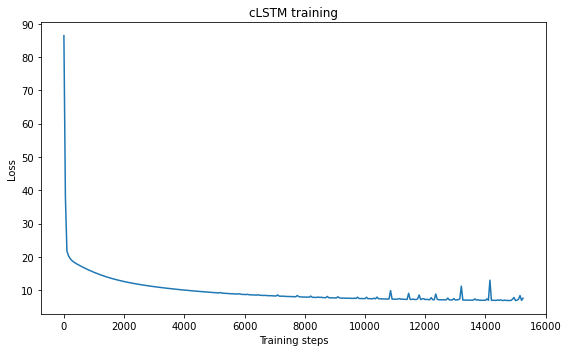

In [7]:
# Loss function plot
plt.figure(figsize=(8, 5))
plt.plot(50 * np.arange(len(train_loss_list)), train_loss_list)
plt.title('cLSTM training')
plt.ylabel('Loss')
plt.xlabel('Training steps')
plt.tight_layout()
plt.show()

In [11]:
weights = clstm.networks[0].lstm.weight_ih_l0

In [12]:
weights

Parameter containing:
tensor([[ 3.5317e-04,  2.2969e-05, -0.0000e+00,  ..., -0.0000e+00,
          1.6354e-05,  6.2708e-06],
        [ 1.0260e-03,  1.1005e-04,  0.0000e+00,  ..., -0.0000e+00,
         -1.4269e-05, -9.1490e-06],
        [-2.3491e-05,  3.1222e-05,  0.0000e+00,  ...,  0.0000e+00,
         -3.5413e-05,  1.0889e-05],
        ...,
        [-2.3420e-04, -9.9136e-06,  0.0000e+00,  ...,  0.0000e+00,
          1.5596e-05,  1.7156e-05],
        [ 1.3516e-03,  4.8048e-05,  0.0000e+00,  ...,  0.0000e+00,
          3.9063e-05,  5.9604e-05],
        [ 1.1447e-03,  6.4901e-05, -0.0000e+00,  ..., -0.0000e+00,
          2.9481e-05,  1.5601e-05]], device='cuda:0', requires_grad=True)

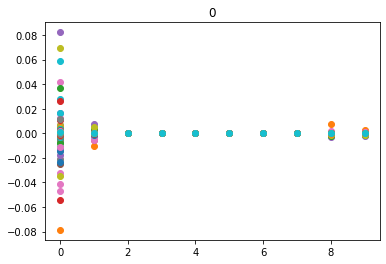

------------------------------------


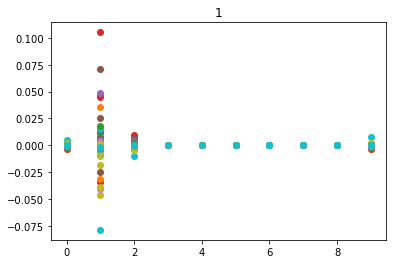

------------------------------------


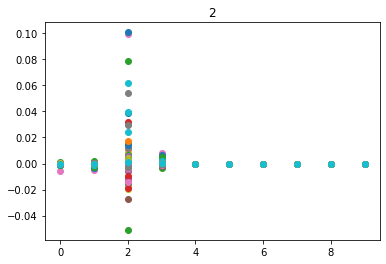

------------------------------------


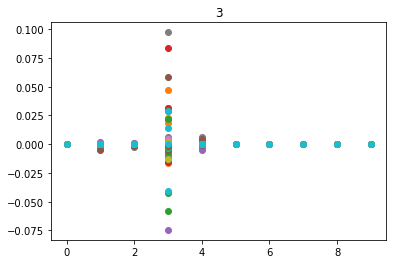

------------------------------------


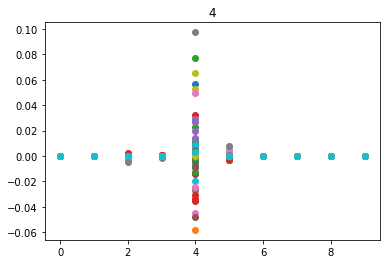

------------------------------------


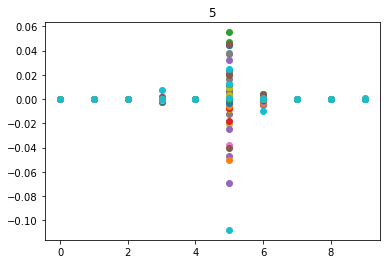

------------------------------------


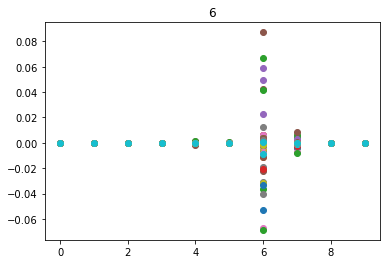

------------------------------------


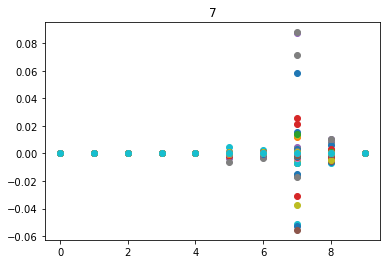

------------------------------------


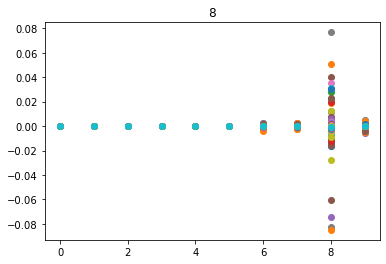

------------------------------------


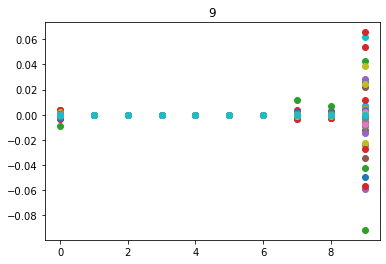

------------------------------------


In [10]:
for i in range(10):
    clstm.weight_causality(i, [0,1,2,3,4,5,6,7,8,9])
    print('------------------------------------')

In [8]:
GC_est = clstm.GC(threshold = False).cpu().data.numpy()

In [9]:
GC_est

array([[0.1988104 , 0.01941437, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00893572, 0.00503952],
       [0.00831497, 0.20461422, 0.02061278, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01050729],
       [0.00640916, 0.00809228, 0.21464393, 0.01493287, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00767823, 0.00370453, 0.20659317, 0.01338784,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00761396, 0.00266959, 0.21912666,
        0.01460366, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00028446, 0.        , 0.00953949, 0.        ,
        0.21264188, 0.01673166, 0.        , 0.        , 0.00078107],
       [0.        , 0.        , 0.        , 0.        , 0.00326595,
        0.00080617, 0.20669848, 0.0192496 , 0.        , 0.        ],
       [0.        , 0.        , 0.       

True variable usage = 40.00%
Estimated variable usage = 41.00%
Accuracy = 99.00%


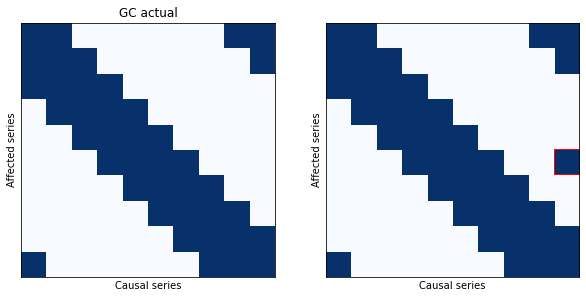

In [8]:
# Check learned Granger causality
GC_est = clstm.GC().cpu().data.numpy()

print('True variable usage = %.2f%%' % (100 * np.mean(GC)))
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))
print('Accuracy = %.2f%%' % (100 * np.mean(GC == GC_est)))

# Make figures
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(GC, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

# Mark disagreements
for i in range(len(GC_est)):
    for j in range(len(GC_est)):
        if GC[i, j] != GC_est[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

plt.show()